# cutting stock problem with HC
## AmirAli Amini
### 610399102

# با یکم تغییر الگوریتم 
# sa
# به این الگوریتم میرسیم (کامل گریدیش میکنم و تعداد همسایه های هر ایتریشن رو بیشتر میکنم)

# algorithm Hill climbing
تپه‌نوردی یک تکنیک بهینه‌سازی متعلق به خانواده الگوریتم‌های جستجوی محلی است؛ یک تکنیک تکرارشونده که با یک راه‌حل دلخواه شروع به کار کرده و سپس تلاش می‌کند تا با تغییر بر روی یک عنصر از راه حل، به پاسخ بهتری دست پیدا کند. اگر این تغییر منجر به ایجاد یک راه حل بهتر شود، تغییر دیگری بر روی این راه حل جدید انجام خواهد گرفت. این روال تا زمانی که بهبود بیشتری در راه حل میسر نباشد ادامه می‌یابد.

# پیاده سازی



استاک لنس رو سیو کردم که بتونم تو تابع فیتنسم ازش استفاده کنم

کلیت کارمم اینجوریه که میام یه رشته تولید میکنم بعد میبینم هرچندتاش پشت سر هم یه رول رو تشکیل میدن و اینجوری فیتنسم رو حساب میکنم
بقیش هم دقیفا مثل همون تی سی پی هست که پایین توصیحاتش رو میزارم

# توضیحات :‌
کلیت الگوریتم میام یه مسیر درست میکنم و فیتنسش رو محاسبه میکنم
هر دفه میام یه همسایه درست میکنم که همسایمون هم فقط نسبت به مسیر الان دوتا نودش باهم جا به میشن و حالا نسبت به اینکه فیتنس همسایه چجوریه میایم با یه احتمالی که میتونه یک هم باشه با مسیر فعلی جا به جاش میکنم و فیتنسش رو سیو میکنم تو کلاس

تو این الگوریتم اومدم الفارو طبق همون چیزی که جزوه بود ۹۹ صدم گذاشتم
و ماکسیمم ایتریشن هم چون خیلی خوب و سریع به جواب میرسه یه چیز زیاد گذاشتم که یه جواب بهتر بهم بده 

اکسپکتد انسرم همون چیزیه که واسه gr209 لازم داریم و مقدار دیفالتشه ولی ممکنه تغییر کنه دیگه

یه دما اولیه داریم اینو یکم طول کشید بدست بیارم چی باشه 

بعد یکم تست کردن یه عدد گذاشتم که اول پویشمون رو خوب کنه بعد که کم کم تاثیرش از بین میره بخاطر تعداد ایتریشن های بالامون دیگه تو انتفاع تمرکز بیشتر شه و انتفاعمون رو خوب کنیم 




### ابتدا کتابخانه هایی که لازم داریم را ایمپورت میکنیم

In [90]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt


# introduction

در این کد یک کلاس SA (Simulated Annealing) را برای حل مسئله cutting stock با استفاده از الگوریتم شبیه سازی آنیل تعریف می کنیم. cutting stock یک مسئله بهینه‌سازی است که در آن کمترین تعداد رول ها برای برش در یک سری قطعه به طول مشخص است
در اینجا خلاصه ای از الگوریتم و توضیح دقیق کد آمده است:
کلاس HC را با پارامترهای زیر اینیشیالایز میکنیم

# TL:
 محدودیت زمانی، حداکثر تعداد تکرار، همون ایتریشن خودمون.

# expectAns:
 کمترین تعداد رول مورد نیاز تقریبی

# ignoreTL:
  برای نادیده گرفتن محدودیت زمانی فلگ گذاری میکنیم.

# inputFile:
فایل ورودی حاوی مختصات شهرها را با استفاده از این تابع  بارگیری میکنیم.

# Intializer:
با استفاده از  این تابع  مسئله را راه اندازی میکنیم:
راه حل تصادفی اولیه (جایگشت تصادفی شهرها) را ایجاد میکنیم.

# fitnessFunction : 
فیتنس یک راه حل را با استفاده از این تابع  که فاصله کل مسیر را محاسبه می کند، ارزیابی میکنیم.

# SARunner:
الگوریتم آنیل شبیه سازی شده را با استفاده از این تابع  اجرا میکنیم:
با تعویض دو شهر تصادفی در راه حل فعلی، یک راه حل همسایه ایجاد میکنیم.
تغییر فیتنس (دلتا) بین همسایه و راه حل فعلی را محاسبه میکنیم.
اگر دلتا منفی است (یعنی راه حل همسایه بهتر است)، راه حل همسایه را به عنوان راه حل فعلی جدید میپذیریم.
اگر دلتا مثبت است (یعنی محلول همسایه بدتر است)، راه حل همسایه را با احتمال بر اساس دمای فعلی و مقدار دلتا میپذیریم.
این فرآیند را تا رسیدن به فیتنس مورد انتظار یا رسیدن به حداکثر تعداد تکرار تکرار میکنیم.

# printBest:
بهترین راه حل پیدا شده را با استفاده از این تابع  چاپ میکنیم.

# printPlot:
با استفاده از این تابع که حداقل فاصله را در هر تکرار ترسیم می کند، پیشرفت الگوریتم را تجسم میکنیم.

# خلاصه :

به طور خلاصه، این کد الگوریتم سرد شدن شبیه‌سازی شده را برای حل مسئله cutting stock پیاده‌سازی می‌کند، جایی که به طور مکرر فضای راه‌حل را با تولید راه‌حل‌های همسایه و پذیرش آن‌ها بر اساس یک احتمال وابسته به دما بررسی می‌کند. دما با گذشت زمان کاهش می‌یابد که باعث می‌شود الگوریتم کمتر راه‌حل‌های بدتری را بپذیرد و به آن اجازه می‌دهد تا روی یافتن راه‌حل‌های بهتر تمرکز کند.

In [91]:
class HC:
    def __init__(self = 500,TL = 300000, expectedAns = 2800 , ignoreTL = False):
        self.TL = TL
        self.expectedAns = expectedAns
        self.ignoreTL = ignoreTL
        self.x = []
        self.y = []


    def inputFile(self , path ):
        lines = open(path, 'r').readlines()
        stockLength = int(lines[0].split()[-1])
        data = list(map(int,lines[3].split(', ')))
        self.intializer(data ,stockLength)
        


    def intializer(self , requests , stockLength=100):
        self.pieceNumber = len(requests)
        self.requests = requests
        self.stockLength = stockLength
        self.solution = list(random.sample(range(self.pieceNumber), self.pieceNumber))
        self.fitness = self.fitnessFunction(self.solution)


    def fitnessFunction(self, path):
        fitness_value = 0
        temp = 0
        for item in path:
            temp += self.requests[item]
            if (temp>self.stockLength): 
                fitness_value+=1
                temp =self.requests[item]
        if (temp):
            fitness_value+=1

        return fitness_value  


    def CreateNeighbor(self,path):
        paths = []
        for i in range (len(path)):
            swapped_path = path.copy()
            temp1 = random.sample(range(self.pieceNumber),1)[0]
            swapped_path[temp1], swapped_path[i] = swapped_path[i], swapped_path[temp1]
            paths.append(swapped_path)
        paths.sort(key=lambda x:self.fitnessFunction(x))
        return paths[0]

    def nextIteration(self):
        neighbor = self.CreateNeighbor(self.solution)
        delta = self.fitnessFunction(neighbor) - self.fitnessFunction(self.solution)
        if delta <= 0:
            self.solution = neighbor
            self.fitness = self.fitnessFunction(self.solution)

    def SARunner(self):
        i = 0
        while (self.fitness > self.expectedAns):
            self.x.append(i)
            self.y.append(self.fitness)
            i +=1
            if (not self.ignoreTL and i > self.TL) or (self.expectedAns >= self.fitness):
                break

            self.nextIteration()
            if(len(self.x)<3 or self.y[-2] != self.fitness):print(f'in itration  {i} the best answer is : {self.fitness}')


    def printBest(self):
        print(f'the best answer after {self.x[-1]} iterations is  : {self.fitness}')
        print('the best answer is : ')
        stockToPrint = []
        temp = 0
        fitness_value = 0
        for item in self.solution:
            temp += self.requests[item]
            stockToPrint.append(self.requests[item])
            if (temp>self.stockLength): 
                fitness_value+=1
                print(fitness_value , ": ", stockToPrint[:-1])
                stockToPrint=[self.requests[item]]
                temp =self.requests[item]

        if (temp):
            fitness_value+=1
            print(fitness_value , ": ", stockToPrint)




    def printPlot(self):
        plt.plot(self.x, self.y)
        plt.xlabel("ith generation")
        plt.ylabel("min distance")
        plt.show()




## ----------------------------------input1----------------------------------------

## input and run
تو اینجا اینپوت رو میخونم و کد رو ران میکنم


In [92]:
input1 = SA(expectedAns=51)
input1.inputFile('input1.stock' )
input1.SARunner()

in itration  1 the best answer is : 61
in itration  2 the best answer is : 60
in itration  3 the best answer is : 59
in itration  4 the best answer is : 58
in itration  5 the best answer is : 58
in itration  7 the best answer is : 57
in itration  8 the best answer is : 57
in itration  9 the best answer is : 56
in itration  10 the best answer is : 55
in itration  11 the best answer is : 55
in itration  21 the best answer is : 54
in itration  22 the best answer is : 54
in itration  52 the best answer is : 53
in itration  53 the best answer is : 53
in itration  312 the best answer is : 52
in itration  313 the best answer is : 52
in itration  1826 the best answer is : 51


# the best answer

In [93]:
input1.printBest()

the best answer after 1825 iterations is  : 51
the best answer is : 
1 :  [125, 555, 88, 117, 86]
2 :  [78, 544, 186]
3 :  [581, 346]
4 :  [627, 351]
5 :  [501, 424]
6 :  [753, 230]
7 :  [301, 106, 315, 268]
8 :  [70, 788]
9 :  [988]
10 :  [45, 371, 515]
11 :  [507, 414]
12 :  [125, 149, 618]
13 :  [312, 23, 88, 495]
14 :  [967]
15 :  [246, 648, 79]
16 :  [292, 33, 549]
17 :  [409, 123, 149, 286]
18 :  [716, 92, 148]
19 :  [337, 356, 284]
20 :  [441, 532]
21 :  [92, 18, 405, 53, 170, 249]
22 :  [80, 106, 557, 211]
23 :  [333, 662]
24 :  [868, 60]
25 :  [933]
26 :  [457, 506]
27 :  [107, 187, 557, 144]
28 :  [914]
29 :  [660, 312]
30 :  [753, 115]
31 :  [295, 437, 126, 109]
32 :  [517, 118, 248]
33 :  [149, 264, 71, 69, 412]
34 :  [251, 368, 354]
35 :  [788, 119]
36 :  [686, 241]
37 :  [99, 181, 653]
38 :  [672, 280, 43]
39 :  [609, 286]
40 :  [987]
41 :  [232, 518, 224]
42 :  [463, 106, 266]
43 :  [557, 84, 266, 75]
44 :  [306, 525, 106]
45 :  [135, 460, 402]
46 :  [116, 678, 171]
47 :

## analysis :

همونجور که رو نمودار مشحصه انتفاع خیلی زیاده و پویش نداریم


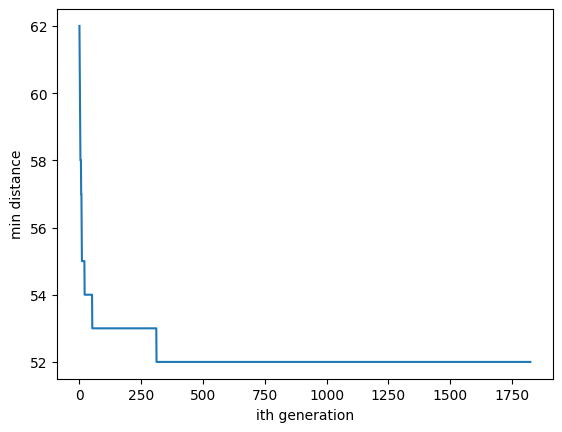

In [94]:
input1.printPlot()

## ----------------------------------input2----------------------------------------

## input and run
تو اینجا اینپوت رو میخونم و کد رو ران میکنم


In [96]:
input2 = SA(expectedAns=73 ,TL=100000)
input2.inputFile('input2.stock' )
input2.SARunner()

in itration  1 the best answer is : 89
in itration  2 the best answer is : 88
in itration  3 the best answer is : 87
in itration  4 the best answer is : 86
in itration  5 the best answer is : 86
in itration  15 the best answer is : 85
in itration  16 the best answer is : 85
in itration  17 the best answer is : 84
in itration  18 the best answer is : 84
in itration  36 the best answer is : 83
in itration  37 the best answer is : 83
in itration  170 the best answer is : 82
in itration  171 the best answer is : 82
in itration  246 the best answer is : 81
in itration  247 the best answer is : 81
in itration  364 the best answer is : 80
in itration  365 the best answer is : 80
in itration  446 the best answer is : 79
in itration  447 the best answer is : 79
in itration  4619 the best answer is : 78
in itration  4620 the best answer is : 78
in itration  26969 the best answer is : 77
in itration  26970 the best answer is : 77
in itration  37275 the best answer is : 76
in itration  37276 the b

# the best answer

In [97]:
input2.printBest()

the best answer after 100000 iterations is  : 76
the best answer is : 
1 :  [1820, 2150, 1560]
2 :  [2200, 1520, 1880]
3 :  [2150, 2200]
4 :  [1930, 1520, 2150]
5 :  [1930, 2100, 1560]
6 :  [2200, 2000, 1380]
7 :  [2150, 1520, 1820]
8 :  [1820, 1820, 1560]
9 :  [2140, 1930, 1520]
10 :  [2140, 1380, 2000]
11 :  [1880, 1710, 1930]
12 :  [2000, 2100, 1380]
13 :  [1930, 1520, 1930]
14 :  [2200, 1880, 1520]
15 :  [1380, 2100, 2050]
16 :  [1880, 2100, 1520]
17 :  [2200, 1380, 1820]
18 :  [2050, 2150, 1380]
19 :  [2140, 2150]
20 :  [2150, 2050, 1380]
21 :  [1560, 1710, 2200]
22 :  [1380, 2150, 1930]
23 :  [2150, 2050, 1380]
24 :  [2200, 2200]
25 :  [2100, 1560, 1930]
26 :  [1880, 1520, 1710]
27 :  [2140, 1520, 1820]
28 :  [2050, 1930, 1520]
29 :  [2140, 1520, 1880]
30 :  [2150, 2050, 1380]
31 :  [2200, 2140]
32 :  [1930, 1520, 1820]
33 :  [2050, 1710, 1820]
34 :  [1560, 2100, 1930]
35 :  [2000, 1380, 2150]
36 :  [2200, 2140]
37 :  [1560, 2100, 1880]
38 :  [2200, 1880, 1520]
39 :  [1710, 2000,

## analysis :


همونجور که رو نمودار مشحصه اخرش انتفاع خیلی زیاده و پویش نداریم


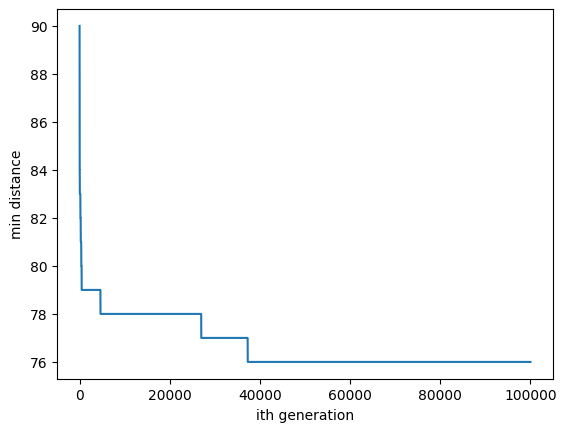

In [98]:
input2.printPlot()

## ----------------------------------input3----------------------------------------

## input and run
تو اینجا اینپوت رو میخونم و کد رو ران میکنم


In [101]:
input3 = SA(expectedAns=115)
input3.inputFile('input3.stock' )
input3.SARunner()

in itration  1 the best answer is : 117
in itration  2 the best answer is : 116
in itration  3 the best answer is : 115


# the best answer

In [102]:
input3.printBest()

the best answer after 2 iterations is  : 115
the best answer is : 
1 :  [430, 12]
2 :  [275, 21, 8, 5, 152, 4, 1]
3 :  [405, 5]
4 :  [154, 3, 8, 35, 5, 1, 76, 132, 3, 8, 1, 3, 18]
5 :  [189, 180, 9, 96]
6 :  [209, 11, 91, 2, 2, 183, 1]
7 :  [20, 228, 18, 18, 14]
8 :  [225, 6, 2, 6]
9 :  [359, 5, 8, 2, 9, 4, 17]
10 :  [158, 7, 3, 1, 6, 2, 10, 4, 264]
11 :  [343, 4, 10]
12 :  [199, 10, 198, 9, 6]
13 :  [186, 1, 14, 112, 6, 133, 1]
14 :  [153, 1, 92, 1, 224, 1, 9, 3, 2, 12]
15 :  [49, 2, 7, 4, 16, 9, 150, 135, 1, 28, 14, 2, 21, 1, 8, 11, 4, 6, 4, 2, 1]
16 :  [134, 18, 1, 92, 134, 27, 19, 5, 5, 6, 13, 11, 8, 5, 2, 13, 2, 3]
17 :  [9, 74, 1, 24, 21, 151]
18 :  [315, 4, 14, 6, 2, 75, 6, 67]
19 :  [21, 3, 7, 16, 4, 2, 7, 98, 14, 5, 2, 6, 6, 8, 9, 7, 2, 243, 2, 10]
20 :  [319, 147]
21 :  [108, 314, 5]
22 :  [118, 109, 66, 19, 18, 12, 25, 6, 9, 3, 7, 3, 5]
23 :  [174, 3, 274]
24 :  [124, 4, 3, 9, 2, 13, 314, 4, 14, 7]
25 :  [78, 205, 38, 3]
26 :  [282, 169]
27 :  [99, 5, 6, 167, 2]
28 :  [339, 

## analysis :

همونجور که رو نمودار مشحصه  انتفاع خیلی زیاده و پویش نداریم

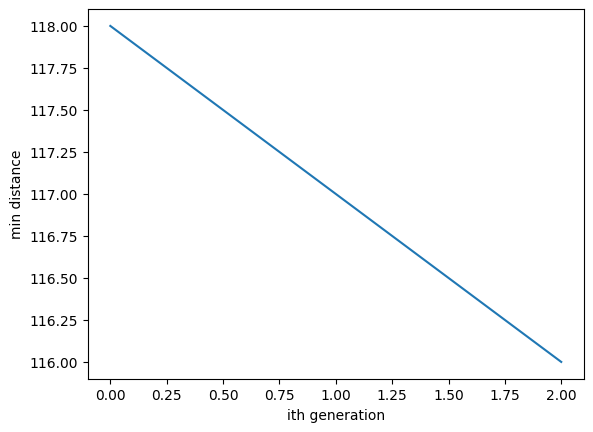

In [103]:
input3.printPlot()

## ----------------------------------input4----------------------------------------

## input and run
تو اینجا اینپوت رو میخونم و کد رو ران میکنم


In [105]:
input4 = SA(expectedAns=0,TL=1000)
input4.inputFile('input4.stock' )
input4.SARunner()

in itration  1 the best answer is : 259
in itration  2 the best answer is : 257
in itration  3 the best answer is : 255
in itration  4 the best answer is : 254
in itration  5 the best answer is : 253
in itration  6 the best answer is : 252
in itration  7 the best answer is : 251
in itration  8 the best answer is : 250
in itration  9 the best answer is : 249
in itration  10 the best answer is : 248
in itration  11 the best answer is : 247
in itration  12 the best answer is : 246
in itration  13 the best answer is : 245
in itration  14 the best answer is : 244
in itration  15 the best answer is : 243
in itration  16 the best answer is : 242
in itration  17 the best answer is : 241
in itration  18 the best answer is : 240
in itration  19 the best answer is : 239
in itration  20 the best answer is : 238
in itration  21 the best answer is : 237
in itration  22 the best answer is : 236
in itration  23 the best answer is : 236
in itration  24 the best answer is : 235
in itration  25 the best 

# the best answer

In [106]:
input4.printBest()

the best answer after 1000 iterations is  : 218
the best answer is : 
1 :  [17, 80]
2 :  [14, 4, 68]
3 :  [60, 3, 26, 1]
4 :  [34, 26, 29]
5 :  [22, 72, 5]
6 :  [4, 95]
7 :  [12, 67, 8, 13]
8 :  [22, 32, 46]
9 :  [61, 29, 10]
10 :  [36, 18, 9, 5, 5, 21, 2, 4]
11 :  [6, 9, 30, 39, 13, 3]
12 :  [5, 7, 8, 28, 4, 10, 37]
13 :  [31, 9, 27, 2, 19, 5]
14 :  [79, 5, 15]
15 :  [11, 10, 5, 15, 54]
16 :  [66, 29]
17 :  [13, 81]
18 :  [14, 51, 25, 5]
19 :  [39, 24, 36]
20 :  [4, 58, 15, 3]
21 :  [44, 56]
22 :  [18, 28, 20, 7, 26]
23 :  [14, 48, 38]
24 :  [27, 28, 32]
25 :  [71]
26 :  [63, 2, 5, 10, 9, 6]
27 :  [7, 59, 2, 17, 2, 5]
28 :  [18, 5, 5, 3, 68]
29 :  [43, 23, 25]
30 :  [92]
31 :  [38, 1, 61]
32 :  [67, 14, 4, 2]
33 :  [98]
34 :  [35, 20, 33, 9]
35 :  [10, 4, 35, 50]
36 :  [15, 30, 34, 5, 16]
37 :  [7, 6, 16, 10, 6, 15, 8, 21, 9]
38 :  [15, 4, 12, 21, 12, 5, 24]
39 :  [63, 36]
40 :  [14, 5, 11, 11, 56]
41 :  [31, 62, 3]
42 :  [24, 20, 14, 25]
43 :  [44, 7, 23, 23, 3]
44 :  [3, 8, 8, 15, 6

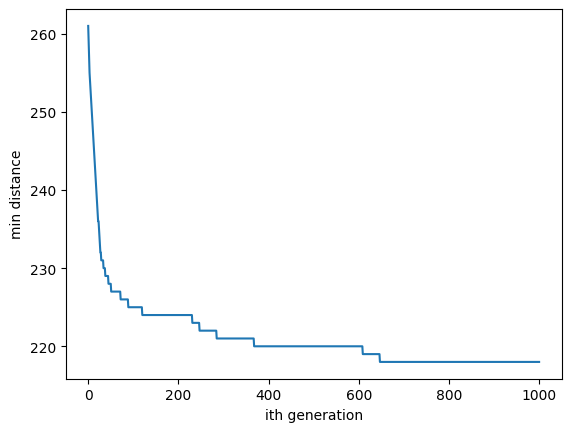

In [107]:
input4.printPlot()

## ----------------------------------End----------------------------------------